In [17]:
import pandas as pd
import numpy as np
import pathlib
from tqdm.notebook import tqdm
import librosa
import awkward as ak
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict
from scipy.signal import decimate # works only with audio data

In [18]:
# Read the TS continous values
X_train = np.load("../../RavdessAudioOnlyNumpy__X_train.npy")
X_test = np.load("../../RavdessAudioOnlyNumpy__X_test.npy")
print(X_train.shape, X_test.shape)

(1828, 304304) (634, 304304)


In [19]:
# Trova le colonne che contengono valori nulli
col_with_nulls = np.isnan(X_train).any(axis = 0)

# Filtra le colonne senza valori nulli
data_nonull_col = X_train[:,~col_with_nulls]

In [20]:
from matrixprofile import *

In [21]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from pyts.approximation import DiscreteFourierTransform


In [22]:
# SAX transform
n_sax_symbols = 8 #di solito 4 

sax = SymbolicAggregateApproximation(n_segments=10, 
                                     alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(data_nonull_col)
sax_dataset_inv = sax.inverse_transform(ts_sax)


/Applications/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [54]:
n_coefs = 1000
#fai prima un'op di allineamento 
dft = DiscreteFourierTransform(n_coefs=n_coefs)
ts_dft = dft.fit_transform(data_nonull_col)

In [24]:
ts_dft.shape

(1828, 32)

In [25]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10#fare un po di ricerca 
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(data_nonull_col)
paa_dataset_inv = paa.inverse_transform(ts_paa)


/Applications/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [26]:
ts_paa = ts_paa.reshape(1828,10)

### Matrix profile su calm ed emotional intensity normal

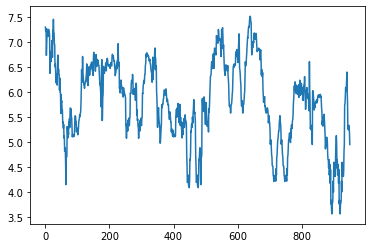

In [108]:
#for x in range (10,21):
w = 10
mp, mpi = matrixProfile.stomp(ts_dft[4], 50)

plt.plot(mp)
    #plt.title(x)
plt.show()

## Motif Discovery

In [110]:
mo, mod  = motifs.motifs(ts_dft[4], (mp, mpi), max_motifs=100)

In [111]:
mo

[[337, 863, 894, 920],
 [28, 56, 89, 117, 177, 231, 265, 295, 388, 421, 449, 477, 505, 559],
 [649, 679, 713, 747, 791, 826, 947],
 [2, 148, 204, 532, 586, 616]]

In [112]:
mod

[3.562939295754916, 4.086977830842333, 4.210971904292841, 5.580335949847982]

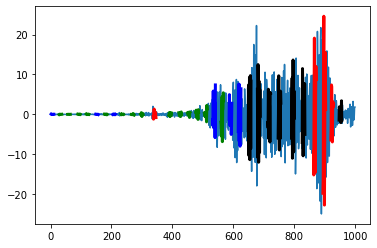

In [113]:
plt.plot(ts_dft[4])
X = ts_dft[4]
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape =X[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

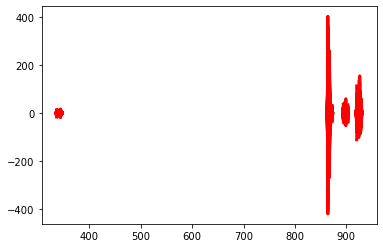

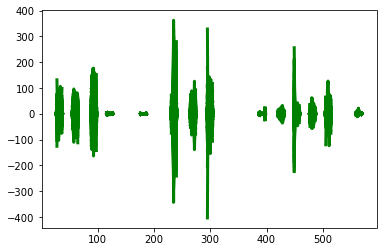

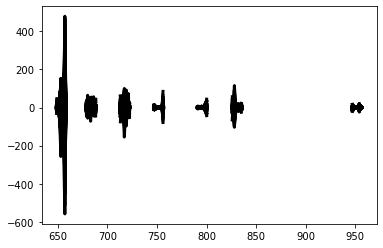

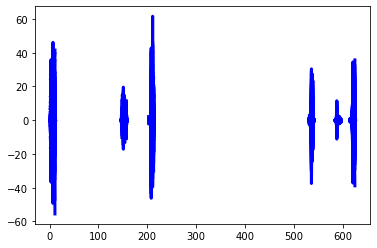

In [114]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_dft[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Anomaly Discovery 

In [115]:
from matrixprofile.discords import discords

In [116]:
anoms = discords(mp, ex_zone=3, k=5)

In [117]:
anoms

array([639,  25, 642, 635,   0])

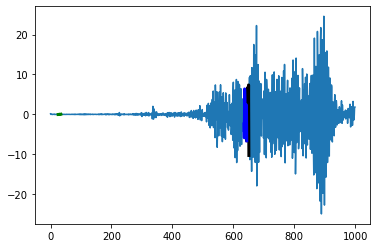

In [118]:
plt.plot(ts_dft[4])
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts_dft[4][a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

## angry e strong 

In [67]:
df_train=pd.read_csv("../../RavdessAudioOnlyNumpy__Y_train.csv")

In [131]:
df_train[df_train['emotion']=='angry' ]

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
28,audio-only,speech,angry,normal,Kids are talking by the door,1st,1,M,03-01-05-01-01-01-01.wav
29,audio-only,speech,angry,normal,Kids are talking by the door,2nd,1,M,03-01-05-01-01-02-01.wav
30,audio-only,speech,angry,normal,Dogs are sitting by the door,1st,1,M,03-01-05-01-02-01-01.wav
31,audio-only,speech,angry,normal,Dogs are sitting by the door,2nd,1,M,03-01-05-01-02-02-01.wav
32,audio-only,speech,angry,strong,Kids are talking by the door,1st,1,M,03-01-05-02-01-01-01.wav
...,...,...,...,...,...,...,...,...,...
1799,audio-only,speech,angry,normal,Dogs are sitting by the door,2nd,18,F,03-01-05-01-02-02-18.wav
1800,audio-only,speech,angry,strong,Kids are talking by the door,1st,18,F,03-01-05-02-01-01-18.wav
1801,audio-only,speech,angry,strong,Kids are talking by the door,2nd,18,F,03-01-05-02-01-02-18.wav
1802,audio-only,speech,angry,strong,Dogs are sitting by the door,1st,18,F,03-01-05-02-02-01-18.wav


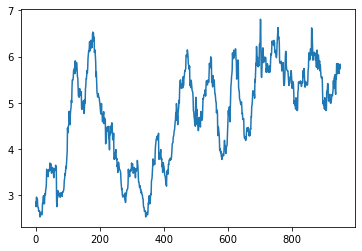

In [134]:
#for x in range (10,21):
w = 10
mp, mpi = matrixProfile.stomp(ts_dft[32], 50)

plt.plot(mp)
    #plt.title(x)
plt.show()

## Motif 

In [135]:
mo, mod  = motifs.motifs(ts_dft[32], (mp, mpi), max_motifs=100)

In [136]:
mo

[[13, 78, 203, 268, 343, 421, 588, 656],
 [46, 122, 177, 311, 389, 494, 559, 627, 696, 935],
 [230, 458, 530, 741, 784, 856],
 [151, 818, 908]]

In [137]:
mod

[2.530782608280623, 3.378465699396985, 3.983709410579193, 4.769607168171189]

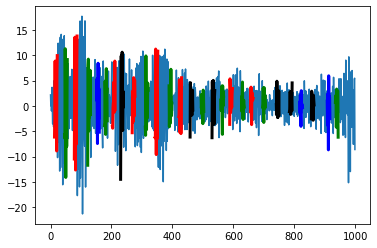

In [139]:
plt.plot(ts_dft[32])
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_dft[32][i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

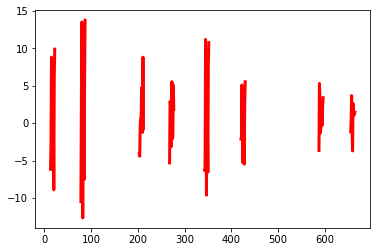

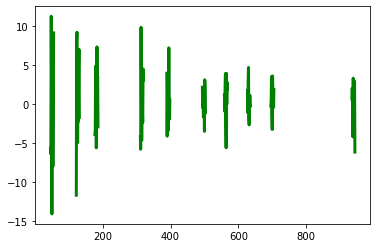

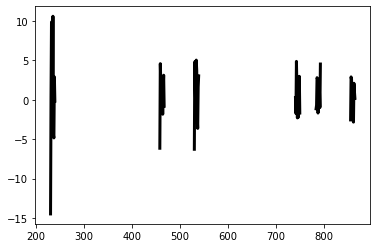

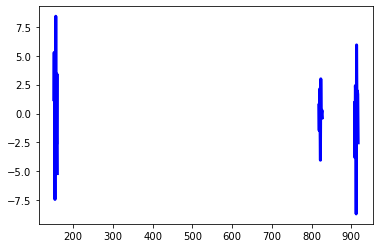

In [140]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_dft[32][i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

### Anomaly 

In [145]:
anoms = discords(mp, ex_zone=3, k=10)

In [146]:
anoms

array([701, 756, 861, 178, 182, 759, 172, 743, 738, 168])

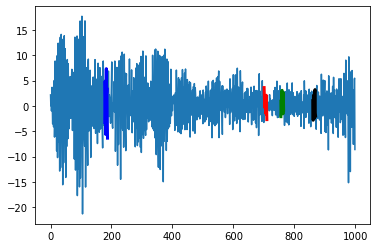

In [147]:
plt.plot(ts_dft[32])
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts_dft[32][a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

### Provo a prendere 2 time series e a farne la media per poi passarla alla matrix profile 

Faccio la media tra un singolo  attore che dice la stessa frase con intensità emozionale normale e poi forte 

In [155]:
df_train[df_train['actor']==1 ]

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav
...,...,...,...,...,...,...,...,...,...
99,audio-only,song,fearful,normal,Dogs are sitting by the door,2nd,1,M,03-02-06-01-02-02-01.wav
100,audio-only,song,fearful,strong,Kids are talking by the door,1st,1,M,03-02-06-02-01-01-01.wav
101,audio-only,song,fearful,strong,Kids are talking by the door,2nd,1,M,03-02-06-02-01-02-01.wav
102,audio-only,song,fearful,strong,Dogs are sitting by the door,1st,1,M,03-02-06-02-02-01-01.wav


In [157]:
 df_train[df_train['emotional_intensity']=='strong']

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
8,audio-only,speech,calm,strong,Kids are talking by the door,1st,1,M,03-01-02-02-01-01-01.wav
9,audio-only,speech,calm,strong,Kids are talking by the door,2nd,1,M,03-01-02-02-01-02-01.wav
10,audio-only,speech,calm,strong,Dogs are sitting by the door,1st,1,M,03-01-02-02-02-01-01.wav
11,audio-only,speech,calm,strong,Dogs are sitting by the door,2nd,1,M,03-01-02-02-02-02-01.wav
16,audio-only,speech,happy,strong,Kids are talking by the door,1st,1,M,03-01-03-02-01-01-01.wav
...,...,...,...,...,...,...,...,...,...
1819,audio-only,speech,disgust,strong,Dogs are sitting by the door,2nd,18,F,03-01-07-02-02-02-18.wav
1824,audio-only,speech,surprised,strong,Kids are talking by the door,1st,18,F,03-01-08-02-01-01-18.wav
1825,audio-only,speech,surprised,strong,Kids are talking by the door,2nd,18,F,03-01-08-02-01-02-18.wav
1826,audio-only,speech,surprised,strong,Dogs are sitting by the door,1st,18,F,03-01-08-02-02-01-18.wav


In [160]:
ts_mean = ts_dft[0]+ts_dft[8]/2


Matrix profile 

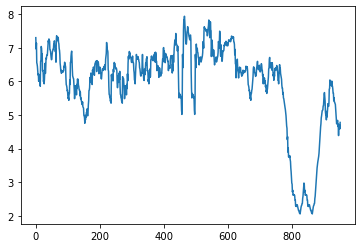

In [161]:
#for x in range (10,21):
#w = 10
mp, mpi = matrixProfile.stomp(ts_mean, 50)

plt.plot(mp)
    #plt.title(x)
plt.show()

## Motif

In [162]:
mo, mod  = motifs.motifs(ts_mean, (mp, mpi), max_motifs=5)

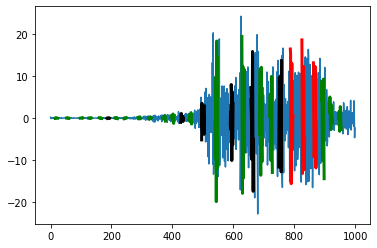

In [163]:
plt.plot(ts_mean)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_mean[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

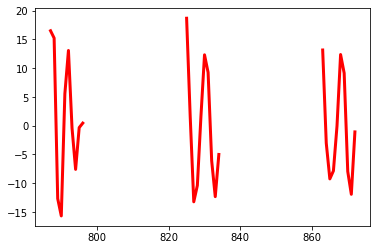

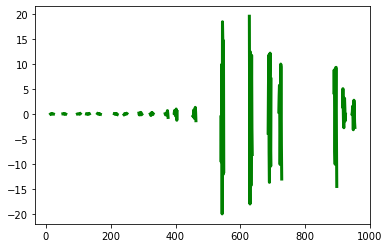

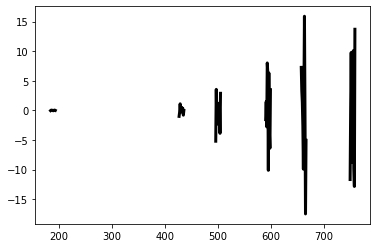

In [164]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts_mean[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

## Anomaly 

In [184]:
anoms = discords(mp, ex_zone=3, k=10)

In [185]:
anoms

array([464, 540, 545, 474, 526, 530, 534, 574, 477, 437])

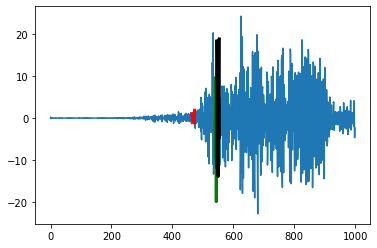

In [186]:
plt.plot(ts_mean)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts_mean[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()

# Analisi shapelets 

In [192]:
from pyts.transformation import ShapeletTransform

In [193]:
y_train = df_train['emotion'].values